In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
data_train = pd.read_csv(rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Decision_tree_project-main\data\processed\data_train.csv")
data_test = pd.read_csv(rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Decision_tree_project-main\data\processed\data_test.csv")


X_train = data_train.drop('diagnositco', axis=1)
y_train = data_train['diagnositco']

X_test = data_test.drop('diagnositco', axis=1)
y_test = data_test['diagnositco']

X = pd.concat([X_train, X_test], axis=1)
y = pd.concat([y_train, y_test], axis=1)

In [15]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
y_pred = modelo.predict(X_test)

In [17]:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7832167832167832
Confusion Matrix:
 [[87 15]
 [16 25]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       102
         1.0       0.62      0.61      0.62        41

    accuracy                           0.78       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.78      0.78      0.78       143



In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(150,75))
plot_tree(modelo, feature_names=X.columns, class_names=['No', 'Sí'], filled=True)
plt.show()

In [19]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(random_state=42))
    
])

In [21]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', DecisionTreeClassifier(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': DecisionTreeClassifier(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__monotonic_cst': None,
 'model__random_state': 42,
 'model__splitter': 'best'}

In [22]:
grid = GridSearchCV(
    estimator=pipe, 
    param_grid={
    'model__max_depth': [1,2,3,4,5, 10, 15],
    'model__min_samples_split': [.5,2,3,4,5, 10, 15, 25],
    'model__criterion': ['gini', 'entropy'],
    'model__min_samples_leaf': [2, 4, 5, 8, 15,20, 23, 25, 27, 30],
    'model__max_features': [2, 4, 5, 7, 8, 9, 10, 11, 24, 37],
    'model__class_weight': [None, 'balanced']
    
    }, 
    cv=7,
    scoring='roc_auc'
)

In [23]:
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,...,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002223,0.000370,0.001283,0.000447,None,gini,1,2,2,0.5,...,0.678571,0.657407,0.722222,0.712963,0.574074,0.629630,0.693733,0.666943,0.048010,20147
1,0.001736,0.000470,0.001548,0.000469,None,gini,1,2,2,2.0,...,0.678571,0.657407,0.722222,0.712963,0.574074,0.629630,0.693733,0.666943,0.048010,20147
2,0.002075,0.000188,0.001149,0.000346,None,gini,1,2,2,3.0,...,0.678571,0.657407,0.722222,0.712963,0.574074,0.629630,0.693733,0.666943,0.048010,20147
3,0.002368,0.000882,0.001847,0.001007,None,gini,1,2,2,4.0,...,0.678571,0.657407,0.722222,0.712963,0.574074,0.629630,0.693733,0.666943,0.048010,20147
4,0.002294,0.000698,0.002137,0.000637,None,gini,1,2,2,5.0,...,0.678571,0.657407,0.722222,0.712963,0.574074,0.629630,0.693733,0.666943,0.048010,20147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,0.002699,0.000454,0.001442,0.000480,balanced,entropy,15,37,30,4.0,...,0.820437,0.797668,0.838134,0.876200,0.628258,0.786351,0.840970,0.798288,0.074664,3594
22396,0.002999,0.000539,0.001645,0.000580,balanced,entropy,15,37,30,5.0,...,0.820437,0.797668,0.838134,0.876200,0.628258,0.786351,0.840970,0.798288,0.074664,3594
22397,0.002830,0.000692,0.001390,0.000566,balanced,entropy,15,37,30,10.0,...,0.820437,0.797668,0.838134,0.876200,0.628258,0.786351,0.840970,0.798288,0.074664,3594
22398,0.002920,0.000334,0.000994,0.000544,balanced,entropy,15,37,30,15.0,...,0.820437,0.797668,0.838134,0.876200,0.628258,0.786351,0.840970,0.798288,0.074664,3594


In [30]:
print(f"Los mejores parametros seran: {grid.best_params_}")

Los mejores parametros seran: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 8, 'model__min_samples_leaf': 25, 'model__min_samples_split': 2}


Los mejores parametros seran: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__max_features': 8, 'model__min_samples_leaf': 25, 'model__min_samples_split': 2}

In [31]:
pipe.set_params(**grid.best_params_)
#pipe.set_params(model__class_weight= None, model__criterion='entropy', model__max_depth=2, model__max_features=8, model__min_samples_leaf=15, model__min_samples_split= 2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        max_features=8, min_samples_leaf=25,
                                        random_state=42))])

In [32]:
pipe.fit(X_train, y_train)

y_pred_pipe = pipe.predict(X_test)

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_pipe))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pipe))
print("Classification Report:\n", classification_report(y_test, y_pred_pipe))

Accuracy: 0.7972027972027972
Confusion Matrix:
 [[91 11]
 [18 23]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       102
         1.0       0.68      0.56      0.61        41

    accuracy                           0.80       143
   macro avg       0.76      0.73      0.74       143
weighted avg       0.79      0.80      0.79       143



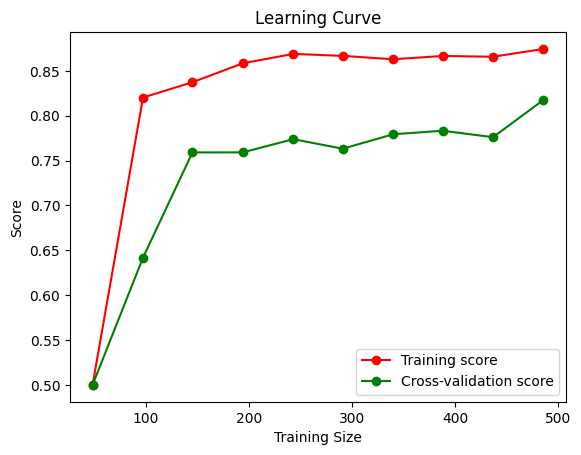

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=7, scoring='roc_auc', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

Inicialmente teniamos un accuracy del 78.32 % valor que no es nada despreiable, sin embargo como parte del ejercicio buscamos optimizar el modelo utilizando herramientas como el pipeline, diferentes tipos de escalado y gridsearch. 

Despues de varios intentos de mejorar los hiperparametros con el grid search no se podia alcanzar un valor aceptable de optimizacion, ya que los parametros que nos daba el grid search reducian el accuracy del modelo, lo que en analisis podemos determinar como un caso en el que el modelo reducia su accuracy para mejorar el fit general de los datos y predecir el comportamiento de datos de forma panoramica, sin embargo tambien se analizo la posibilidad de tener un modelo que cayese en el underfiting. Esto fue descartado haciendo un plot de curva de aprendizaje, donde ahora podemos ver un comportamiento similar entre nuestras curvas, lo que indica un giro positivo en el modelo.

La forma de aumentar el accuracy del modelo fue utilizando como scoring para el search grid a el metodo ROC AUC que se enfoca mas en que el modelo distinga entre clases positivas y negativas, con lo que logramos aumentar el  accuracy del modelo hasta 79.72%. La necesidad de utilizar este metodo concuerda con la literatura, pues es mencionado que dicho metodo es util para casos en los que se tienen clases desbalanceadas.

Guardamos el modelo y damos por concluido el proyecto

In [36]:
from joblib import dump

dump(grid.best_estimator_, rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Decision_tree_project-main\models\best_params.joblib")

['C:\\Users\\wipip\\OneDrive\\Documentos\\GitHub\\Decision_tree_project-main\\models\\best_params.joblib']

In [37]:
dump(pipe, rf"C:\Users\wipip\OneDrive\Documentos\GitHub\Decision_tree_project-main\models\pipeline.joblib")

['C:\\Users\\wipip\\OneDrive\\Documentos\\GitHub\\Decision_tree_project-main\\models\\pipeline.joblib']